# Muffinsform i fritt fall


Draget, foråsaket av luftmotstand, til et objekt kan utrykkes som
$$ L=\tfrac{1}{2}\, \rho \, C_D \, A \, v^2 $$
der:
-  $C_D$ er dragkoeffisienten for legemet
-  $\rho$ (gresk bokstav rho) er mediets (gassens eller væskens) tetthet
-  $A$ er arealet av det tverrsnittet av legemet som står normalt på (på tvers av) strømningsretningen
-  $v$ er legemets relative hastighet i forhold til mediet (gassen eller væsken)

Gravitasjonskreftene til en gjenstand med masse, $m$, er $G= m\,g$, der $g=9.81$m/s$^2$. Vi skal nå se på hvordan luftmotstand og gravitasjon påvirker en muffinsformen når vi slipper den.

-  $\rho = 1.2$ kg/m$^3$, tettheten til lufta
-  $C_d = 0.3$, dragkoofesienten varier egentlig med hastigheten. Les mere om den her <a href='https://en.wikipedia.org/wiki/Drag_coefficient'>https://en.wikipedia.org/wiki/Drag_coefficient</a>
-  $A = \pi r^2 = \pi \cdot 3^2$ 
-  $m=0.00326$ kg, massen til muffinsformen


Vi bruker først newtons første lov om summen av krefter og så andre lov. $\Sigma F = ma$. Vi setter også alle konstanetene til $B$, $L=\frac{1}{2}\, \rho \, C_D \, A \, v^2 = B v^2$





\begin{align}
    \Sigma F & = G - L\\
    ma & = mg - B v^2\\
    a & = g - \frac{B v^2}{m}
\end{align}
$$$$

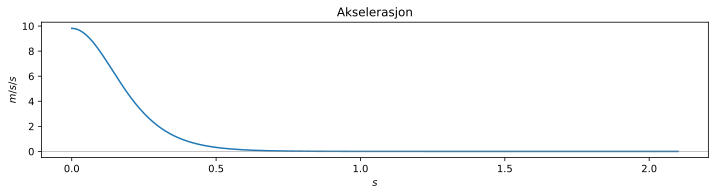

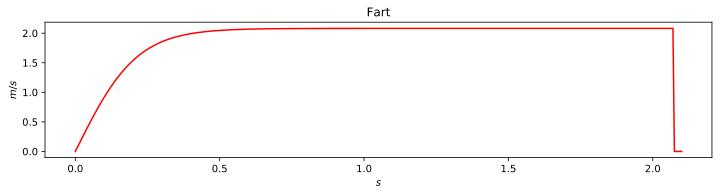

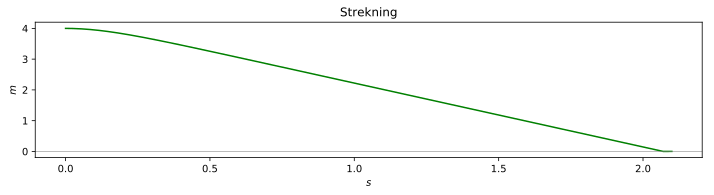

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'svg'

#Fysiske størelse
g = 9.816
a_0 = g
v_0 = 0
s_0 = 4

m = 0.00326
ρ = 1.2
C_d = 0.8
A = 3.14*0.07**2
B = ρ*C_d*A/2


#Tidsintervaller
T = 2.1
dt = 0.005
N = round(T/dt)
t = np.linspace(0, T, N)
a = np.zeros(N)
v = np.zeros(N)
s = np.zeros(N)

a[0] = a_0
v[0] = v_0
s[0] = s_0

#Eulers helmakse metode
for i in range(N - 1):
    if s[i] <= 0:
        break
    a[i] = g - (B*v[i]**2)/m
    v[i + 1] = v[i] + a[i]*dt
    s[i + 1] = s[i] - v[i +1]*dt
    
    

plt.rcParams['figure.figsize'] = (12, 2.5)
plt.rcParams.update({'font.size': 10})

#Akselerasjonsplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m/s/s$') # Merker y-aksen
plt.title('Akselerasjon') #Tittel
plt.plot(t, a)
plt.axhline(0, color='gray', lw=0.5)
plt.show()

#Fartssplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m/s$') # Merker y-aksen
plt.title('Fart') #Tittel
plt.plot(t, v, 'r')
plt.show()

#Strekningsplot
plt.xlabel('$s$') # Merker x-aksen
plt.ylabel('$m$') # Merker y-aksen
plt.title('Strekning') #Tittel
plt.plot(t, s, 'g')
plt.axhline(0, color='gray', lw=0.5)
plt.show()

In [12]:
from vpython import *
scene = canvas()

scene.forward = vector(-0.4,-0.3,-1)
boxy = box(size=vector(5,0.2,5), color=vector(0.5, 0.5, 0.5), texture=textures.earth)

muffinsform = sphere(radius=0.2, pos=vector(0, 4, 0), color=color.yellow)
l1 = local_light(pos=muffinsform.pos, color=muffinsform.color)

i=0
for i in s:
    rate(1/dt)
    i = i + dt
    scene.forward = vector(i,-0.3,-1)
    l1.pos = muffinsform.pos = vector(0, i+0.25, 0)

<IPython.core.display.Javascript object>